## 선형 회귀 예제

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측 예제

### 사용 데이터 
- Boston Housing Price (보스턴 주택 가격 데이터)
- 사이킷런 1.0 대 버전에서만 제공 (1.2 버전 이후 제공되지 않음)

---
- 보스턴 시의 주택 가격에 대한 데이터
    - 주택의 여러가진 요건들과 주택의 가격 정보 포함
    - 주택의 가격에 영향을 미치는 요소 분석
- 데이터 수 : 506 개
- 피처 개수 :  14 개


In [1]:
import sklearn
sklearn.__version__

'1.3.0'

피처 설명  
- CRIM: 지역별 범죄 발생률. 1인당 범죄율  
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율  
- INDUS: 비상업지역이 점유하고 있는 토지의 비율(넓이 비율)  
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)  
- NOX: 일산화질소 농도  
- RM: 주택 1가구당 평균 방의 개수  
- AGE: 1940년 이전에 건축된 소유주택의 비율  
- DIS: 5개 주요 고용센터까지의 가중 거리(접근성 지수)  
- RAD: 고속도로 접근 용이도(접근성 지수)  
- TAX: 10,000달러당 재산세율  
- PTRATIO: 자치시(town)별 학생/교사 비율  
- B: 자치시별 흑인 거주 비율  
- LSTAT: 하위 계층의 비율  
- MEDV: 본인 소유의 주택 가격(중앙값) (단위: $1,000)  

### 보스턴 주택 가격 예측 모델 생성  
- 사용 데이터 세트 : 보스턴 주택 가격 데이터 세트  
- 데이터 준비 : 피처 데이터 / 레이블 데이터  
- 데이터 세트 분리 : 학습 / 테스트 데이터 세트   
    - train_test_split() 이용  
- 사용 알고리즘(모델) : LinearRegression  
- 모델 학습 및 예측 수행 : fit() / predict()  
- 모델 평가  
    - MSE 측정 : metrics 모듈의 mean_squared_error() 이용   
    - RMSE 측정 : 사이킷런이 지원하지 않기 때문에 np.sqrt() 이용  
    - R2 Score 측정 : r2_score() 이용    
- 교차 검증 수행  

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

boston_df = df_pop = pd.read_csv('../data/boston_dataset.csv', index_col=0) 
boston_df.head()
boston_df.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


집 값에 크게 영향을 미치는 중요한 요소 추청  
- 삶의 편의성을 생각하면 : RM (거주할 수 있는 방 개수)
- RAD : 고속도로 접근 용이도 (미국은 차가 있어야 하니까)

각 피처별로 주택 가격에 미치는 영향도를 조사  
총 8개의 피처에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인

Seaborn의 regplot() 이용  
- 각 ax마다 피처와 PRICE의 관계 표현  
- 2차원 평면에서 X축을 피처, Y축을 타깃값으로 설정하면  
- 산점도와 함께 선형 회귀 직선표시  

### 집 값에 영향을 미치는 피처 확인 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: xlabel='RM', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='ZN', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='INDUS', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='NOX', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='AGE', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='PTRATIO', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='LSTAT', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='RAD', ylabel='PRICE'>

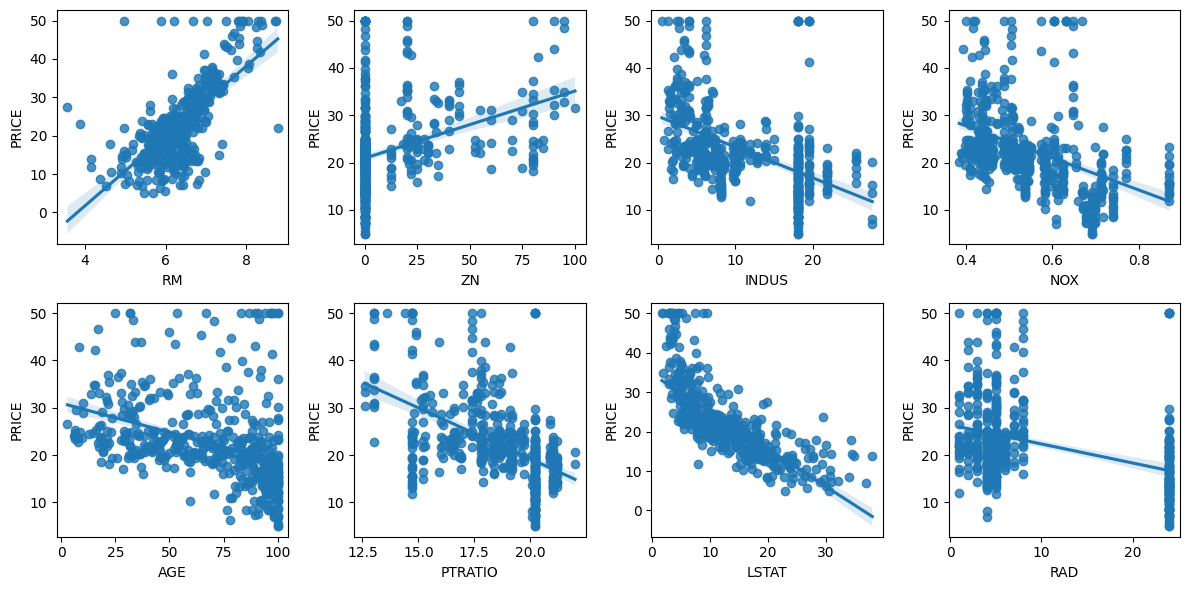

In [6]:
# 8개 피처 선택
# 방의 개수
# 25,000평방피트를 초과하는 거주 지역의 비율
# 비상업지역이 점유하고 있는 토지의 비율(넓이 비율)
# 일산화질소 농도
# 1940년 이전에 건축된 소유주택의 비율
# 학생/교사 비율
# 하위 계층의 비율
# 고속도로 접근 용이도

cols = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
price = boston_df['PRICE']
plt.figure(figsize=(12, 6))
for idx, col in enumerate(cols):
    plt.subplot(2, 4, idx+1)
    sns.regplot(x=boston_df[col], y=price)
plt.tight_layout()
plt.show()

### 데이터 준비 

In [7]:
X_data = boston_df[cols]
y_target = boston_df['PRICE']

### 데이터 세트 분리

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_data ,
                                                       y_target,
                                                       test_size=0.3, 
                                                       random_state=156)

### 예측 모델 생성 

In [9]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

### 모델 평가

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr_reg.predict(X_test)
print('MSE : %.6f'%mean_squared_error(y_test, y_pred))
print('RMSE : %.6f'%np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 : %.6f'%r2_score(y_test, y_pred))

MSE : 18.567015
RMSE : 4.308946
R2 : 0.739400


In [11]:
print('절편 : %.2f'%lr_reg.intercept_)
print('계수 : ', np.round(lr_reg.coef_, 1))

절편 : 28.34
계수 :  [  3.9   0.    0.1 -11.4   0.   -1.1  -0.6   0.1]


In [12]:
X_test.apply(lambda x: sum(np.array(x)*lr_reg.coef_)+lr_reg.intercept_, axis=1).sort_values(ascending=False)
pd.Series(lr_reg.predict(X_test)).sort_values(ascending=False)

162    40.141466
267    39.019907
196    38.528327
268    37.921713
233    37.360722
         ...    
489    11.440876
392     8.819499
385     6.592331
386     5.791204
414    -0.103567
Length: 152, dtype: float64

52    40.141466
51    39.019907
72    38.528327
65    37.921713
13    37.360722
        ...    
29    11.440876
8      8.819499
63     6.592331
25     5.791204
43    -0.103567
Length: 152, dtype: float64

### 교차 검증 수행

교차 검증 수행
- 5개의 폴드 세트에서 corss_val_score()를 이용해 교차 검증 수행     
- MSE와 RMSE 측정  
- corss_val_score()에서는 RMSE를 제공하지 않음    
    - MSE 수치 결과를 RMSE로 변환 작업 필요     

MSE 구하는 방법      
- MSE 값을 반환받기 위해 매개변수 scoring='neg_mean_squared_error' 설정  
    - 주의!!  
    - 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인데      
        - 예: 정확도, fi, recall, precision, roc_auc   
    - MSE는 낮을수록 좋은 회귀 모델  
        - 그래서 scoring='neg_mean_squared_error'로 사이킷런의 scoring 함수를 호출하면  
        - MSE 값에 -1을 곱해서 반환됨  
        - 따라서 corss_val_score()에서 반환된 값에 다시 -1을 곱해야   
            - 양의 값인 원래 모델에서 계산된 MSE 값이 됨  
- 결론 :  
    - scoring='neg_mean_squared_error' 설정  
    - 반환된 값에 -1 곱해서 양의 값으로 변환해서 사용  

RMSE 구하는 방법  
- 사이킷런에서 RMSE는 제공하지 않으므로  
- MSE 수치 결과를 RMSE로 변환할 필요  
- 변환된 MSE 값에 넘파이 sqrt() 함수를 적용해서 구함  


In [13]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr_reg, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_score = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_score)

print('Negative Mean Squared Error : ', np.round(neg_mse_scores, 2))
print('Root Mean Squared Error : ', np.round(rmse_score, 2))
print('Average of Root Mean Squared Error : ', np.round(avg_rmse, 2))

Negative Mean Squared Error :  [-11.58 -27.31 -38.75 -89.6  -35.25]
Root Mean Squared Error :  [3.4  5.23 6.23 9.47 5.94]
Average of Root Mean Squared Error :  6.05


### LinearRegression 하이퍼 파라미터 튜닝
- LinearRegression 모델은 파라미터가 몇 개 없기 때문에
- 하이퍼 파라미터 튜닝은 거의 수행하지 않음
- 하이퍼 파라미터 튜닝을 적용하려면 릿리, 라쏘, 엘라스틱 넷을 사용   

In [14]:
from sklearn.preprocessing import StandardScaler

StdSc = StandardScaler()
X_data_scaled = StdSc.fit_transform(X_data)
y_target_scaled = StdSc.fit_transform(np.array(y_target).reshape(-1, 1))

X_train , X_test , y_train , y_test = train_test_split(X_data_scaled,
                                                       y_target_scaled,
                                                       test_size=0.3, 
                                                       random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

y_pred = lr_reg.predict(X_test)
print('MSE : %.6f'%mean_squared_error(y_test, y_pred))
print('RMSE : %.6f'%np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 : %.6f'%r2_score(y_test, y_pred))

LinearRegression()

MSE : 0.219937
RMSE : 0.468975
R2 : 0.739400
